### Ultralytisc Yolo v3 설치

In [1]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 9862, done.
remote: Total 9862 (delta 0), reused 0 (delta 0), pack-reused 9862
Receiving objects: 100% (9862/9862), 9.19 MiB | 25.23 MiB/s, done.
Resolving deltas: 100% (6667/6667), done.


In [2]:
!cd yolov3;pip install -qr requirements.txt

     |████████████████████████████████| 636 kB 4.7 MB/s 


In [3]:
!cat yolov3/requirements.txt

# pip install -r requirements.txt

# base ----------------------------------------
matplotlib>=3.2.2
numpy>=1.18.5
opencv-python>=4.1.2
Pillow
PyYAML>=5.3.1
scipy>=1.4.1
torch>=1.7.0
torchvision>=0.8.1
tqdm>=4.41.0

# logging -------------------------------------
tensorboard>=2.4.1
# wandb

# plotting ------------------------------------
seaborn>=0.11.0
pandas

# export --------------------------------------
# coremltools>=4.1
# onnx>=1.9.0
# scikit-learn==0.19.2  # for coreml quantization

# extras --------------------------------------
# Cython  # for pycocotools https://github.com/cocodataset/cocoapi/issues/172
pycocotools>=2.0  # COCO mAP
thop  # FLOPS computation


In [6]:
from IPython.display import Image, clear_output
import torch

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (CPU)


In [7]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [8]:
!cd yolov3/data/images;ls -lia

total 656
6822052 drwxr-xr-x 2 root root   4096 Aug  4 14:30 .
6822042 drwxr-xr-x 4 root root   4096 Aug  4 14:30 ..
6822053 -rw-r--r-- 1 root root 487438 Aug  4 14:30 bus.jpg
6822054 -rw-r--r-- 1 root root 168949 Aug  4 14:30 zidane.jpg


### Data 다운로드

In [9]:
!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-08-04 14:33:23--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2021-08-04 14:33:23 (10.5 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



In [10]:
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2021-08-04 14:33:32--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2021-08-04 14:33:32--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2021-08-04 14:33:32--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.

# Inference

In [19]:
## --project를 설정하지 않으면 자동으로 runs/detect/exp로 detect된 결과가 저장됨.(2번째 수행하면 exp2 디렉토리가 생성됨. 
## coco로 pretrained된 yolov3.pt weight가 없으면 자동으로 download함. 
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CPU

100% 118M/118M [00:03<00:00, 36.1MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (2.254s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (1.694s)
Results saved to runs/detect/exp
Done. (4.132s)


In [20]:
# 결과가 runs/detect/exp에 저장됨
!ls -lia /yolov3/runs/detect/exp

ls: cannot access '/yolov3/runs/detect/exp': No such file or directory


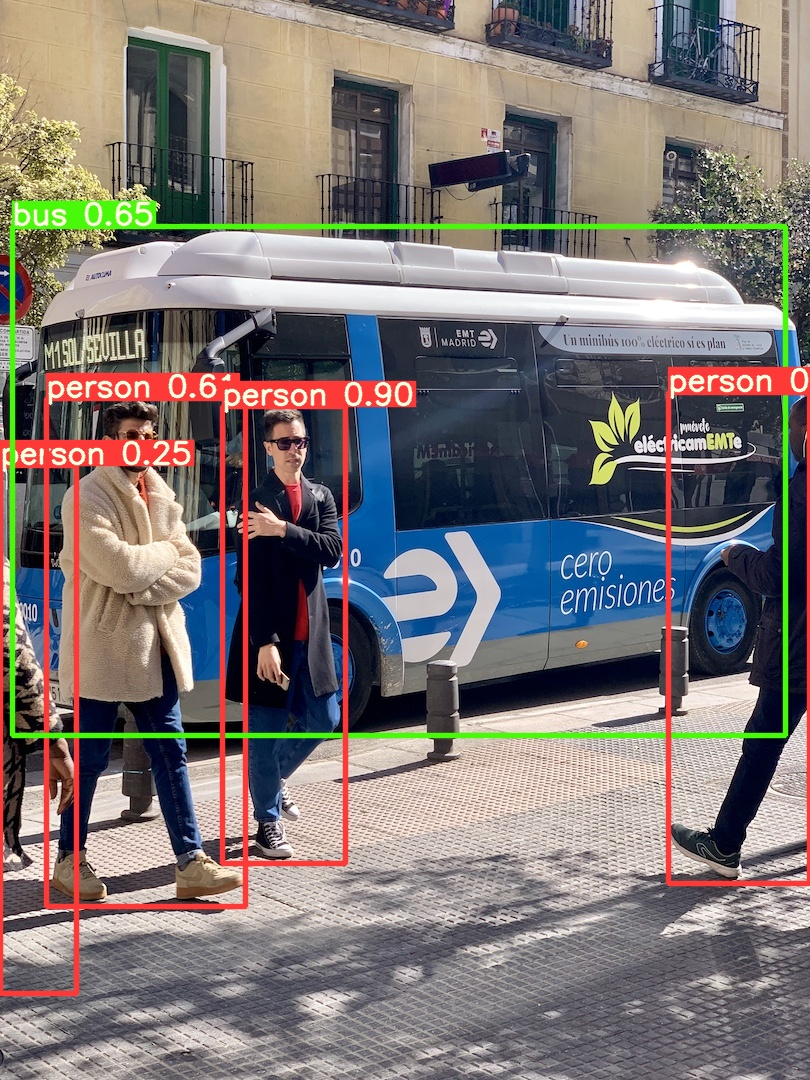

In [21]:
Image(filename='/content/yolov3/runs/detect/exp/bus.jpg', width=600)

In [22]:
!cd yolov3;python detect.py --weight yolov3.pt --img 600 --conf 0.25 --source /content/data/beatles01.jpg \
--project /content/data --name=run_imge --exist-ok --line-thickness 1

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=600, iou_thres=0.45, line_thickness=1, max_det=1000, name='run_imge', nosave=False, project='/content/data', save_conf=False, save_crop=False, save_txt=False, source='/content/data/beatles01.jpg', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/data/beatles01.jpg: 480x608 5 persons, 11 cars, 1 truck, 1 tie, 1 baseball bat, Done. (2.042s)
Results saved to /content/data/run_imge
Done. (2.075s)


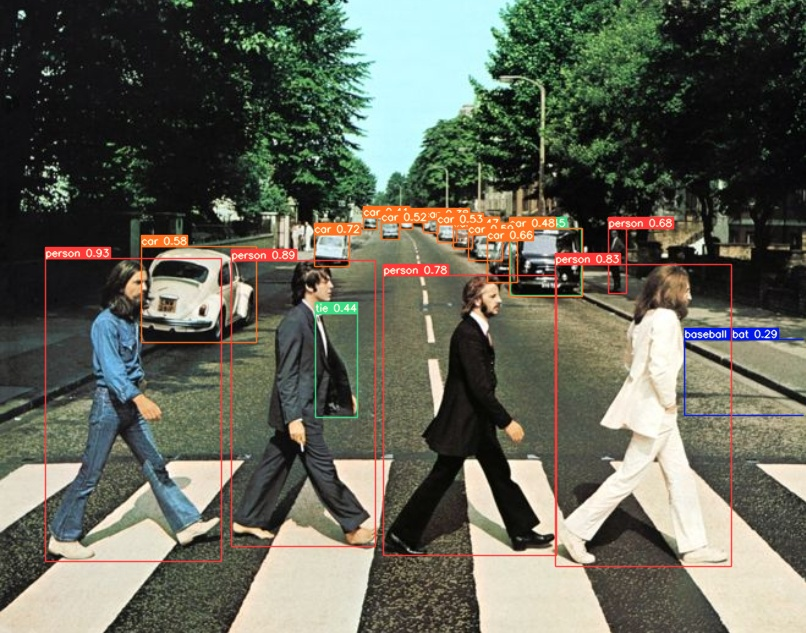

In [24]:
Image(filename='/content/data/run_imge/beatles01.jpg', width=600)

In [ ]:
# --project를 /content/data/run_video 로 설정하여 Detect된 영상을 저장.  
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/Night_Day_Chase.mp4 \
                            --project=/content/data/run_video --exist-ok --line-thickness 1

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=1, max_det=1000, name='exp', nosave=False, project='/content/data/run_video', save_conf=False, save_crop=False, save_txt=False, source='/content/data/Night_Day_Chase.mp4', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CPU

Fusing layers... 
